In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Load Data

In [26]:
data = pd.read_excel('unemployment-data.xlsx', sheet_name=1)

In [27]:
data

,"m=23, n=5",1,2,3,4,5,x̄,R,Unnamed: 8
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.280000,0.200000,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.760000,0.200000,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.940000,0.300000,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.660000,0.200000,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.240000,0.300000,NaN
5,2006.0,4.7,4.8,4.7,4.7,4.6,4.700000,0.200000,NaN
6,2007.0,4.6,4.5,4.4,4.5,4.4,4.480000,0.200000,NaN
7,2008.0,5.0,4.9,5.1,5.0,5.4,5.080000,0.500000,NaN
8,2009.0,7.8,8.3,8.7,9.0,9.4,8.640000,1.600000,NaN
9,2010.0,9.8,9.8,9.9,9.9,9.6,9.800000,0.300000,NaN


In [4]:
data.head()

,"m=23, n=5",1,2,3,4,5,x̄,R,Unnamed: 8
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.28,0.2,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.76,0.2,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.94,0.3,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.66,0.2,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.24,0.3,NaN


In [5]:
data.columns = ['m=23, n=5','1', '2', '3', '4', '5','Xbar', 'R', 'Noname']

In [6]:
data

,"m=23, n=5",1,2,3,4,5,Xbar,R,Noname
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.280000,0.200000,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.760000,0.200000,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.940000,0.300000,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.660000,0.200000,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.240000,0.300000,NaN
5,2006.0,4.7,4.8,4.7,4.7,4.6,4.700000,0.200000,NaN
6,2007.0,4.6,4.5,4.4,4.5,4.4,4.480000,0.200000,NaN
7,2008.0,5.0,4.9,5.1,5.0,5.4,5.080000,0.500000,NaN
8,2009.0,7.8,8.3,8.7,9.0,9.4,8.640000,1.600000,NaN
9,2010.0,9.8,9.8,9.9,9.9,9.6,9.800000,0.300000,NaN


## Calculate Control Limits

In [7]:
# Control Chart Constants
d2 = 2.326
a2 = .577
d3 = 0
d4 = 2.114

In [8]:
r_bar = data['R'].mean()
r_ucl = r_bar * d4
r_lcl = r_bar * d3

## R Chart Dataframe

In [9]:
R = copy.deepcopy(data)

In [10]:
R.insert(7,'Rbar', r_bar)
R.insert(8,'R_UCL', r_ucl)
R.insert(9,'R_LCL', r_lcl)

In [11]:
R.head(5)

,"m=23, n=5",1,2,3,4,5,Xbar,Rbar,R_UCL,R_LCL,R,Noname
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.28,0.843478,1.783113,0.0,0.2,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.76,0.843478,1.783113,0.0,0.2,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.94,0.843478,1.783113,0.0,0.3,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.66,0.843478,1.783113,0.0,0.2,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.24,0.843478,1.783113,0.0,0.3,NaN


## R chart: Matplotlib

In [12]:
def make_controlchart_plt(data, main, ucl, lcl, median, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 
     
    plt.plot(R[main], marker = "8")
    plt.plot(R[ucl], color='b', label = 'UCL')
    plt.plot(R[lcl], color='k', label = 'LCL')
    plt.plot(R[median], color='r', label ='Median')
    
    plt.legend()
    plt.grid()
    plt.title('R Chart')
    plt.xlabel('Sample')
    plt.ylabel('Sample Range')
    
    return fig

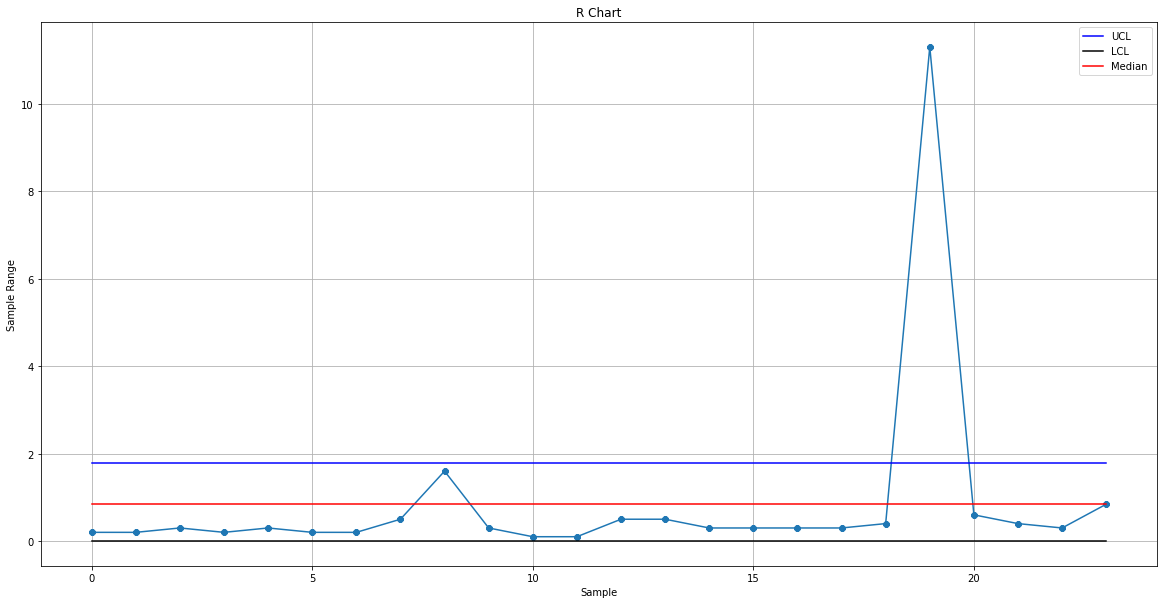

In [13]:
fig_plt = make_controlchart_plt(data, 'R', 'R_UCL', 'R_LCL', 'Rbar', 'R Bar Chart', 'Sample', 'Sample Range')

## X-Bar Chart: Matplotlib

In [14]:
# Xbar control chart constants
a2 = .577
Rbar = 0.843478
Xdoublebar = data['Xbar'].mean()
XB_ucl = Xdoublebar + (a2 * Rbar)
XB_lcl = Xdoublebar - (a2 * Rbar)

In [15]:
X = copy.deepcopy(data)

In [16]:
X

,"m=23, n=5",1,2,3,4,5,Xbar,R,Noname
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.280000,0.200000,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.760000,0.200000,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.940000,0.300000,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.660000,0.200000,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.240000,0.300000,NaN
5,2006.0,4.7,4.8,4.7,4.7,4.6,4.700000,0.200000,NaN
6,2007.0,4.6,4.5,4.4,4.5,4.4,4.480000,0.200000,NaN
7,2008.0,5.0,4.9,5.1,5.0,5.4,5.080000,0.500000,NaN
8,2009.0,7.8,8.3,8.7,9.0,9.4,8.640000,1.600000,NaN
9,2010.0,9.8,9.8,9.9,9.9,9.6,9.800000,0.300000,NaN


In [17]:
X.insert(7,'X_double_bar', Xdoublebar)
X.insert(8,'XB_UCL', XB_ucl)
X.insert(9,'XB_LCL', XB_lcl)

In [18]:
X.head()

,"m=23, n=5",1,2,3,4,5,Xbar,X_double_bar,XB_UCL,XB_LCL,R,Noname
0,2001.0,4.2,4.2,4.3,4.4,4.3,4.28,5.869565,6.356252,5.382878,0.2,NaN
1,2002.0,5.7,5.7,5.7,5.9,5.8,5.76,5.869565,6.356252,5.382878,0.2,NaN
2,2003.0,5.8,5.9,5.9,6.0,6.1,5.94,5.869565,6.356252,5.382878,0.3,NaN
3,2004.0,5.7,5.6,5.8,5.6,5.6,5.66,5.869565,6.356252,5.382878,0.2,NaN
4,2005.0,5.3,5.4,5.2,5.2,5.1,5.24,5.869565,6.356252,5.382878,0.3,NaN


In [19]:
def make_xbar_controlchart_plt(data, main, XB_ucl, XB_lcl, median, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 
     
    plt.plot(X[main], marker = "8")
    plt.plot(X[XB_ucl], color='b', label = 'XB_UCL')
    plt.plot(X[XB_lcl], color='k', label = 'XB_LCL')
    plt.plot(X[median], color='r', label ='Xdoublebar')
    
    plt.legend()
    plt.grid()
    plt.title('X Chart')
    plt.xlabel('Sample')
    plt.ylabel('Sample Range of Xbar')
    
    return fig

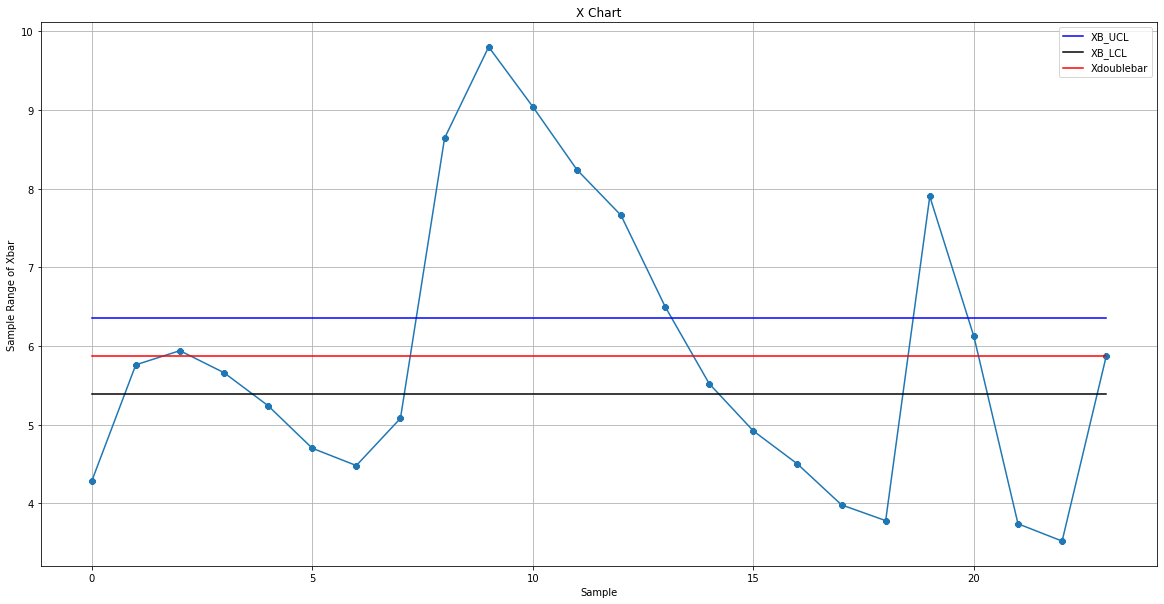

In [20]:
fig_plt = make_xbar_controlchart_plt(data, 'Xbar', 'XB_UCL', 'XB_LCL', 'X_double_bar', 'X Bar Chart', 'Sample', 'Sample Range ofXbar Chart')

## R Bar Chat Without an Outlier

In [126]:
data_wo_outlier = pd.read_excel('unemployment-data_removed_r_outlier.xlsx',sheet_name=1) # data_wo_outlier: data_without_outlier

In [127]:
data_wo_outlier

,"m=23, n=5",1,2,3,4,5,x̄,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
5,2006,4.7,4.8,4.7,4.7,4.6,4.70,0.2
6,2007,4.6,4.5,4.4,4.5,4.4,4.48,0.2
7,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5
8,2009,7.8,8.3,8.7,9.0,9.4,8.64,1.6
9,2010,9.8,9.8,9.9,9.9,9.6,9.80,0.3


In [23]:
# Hence 2020 is an outbound point which has value Ri = 11.30 at the graph, it should be removed because it is an assignable cause
# At that time virus COVID19 was about to thrive slightly.

In [128]:
# Control Chart Constants
d2 = 2.326
a2 = .577
d3 = 0
d4 = 2.114

In [129]:
r_wo_outlier_bar = data_wo_outlier['R'].mean()
r_wo_outlier_ucl = r_wo_outlier_bar * d4
r_wo_outlier_lcl = r_wo_outlier_bar * d3

In [130]:
R_wo_outlier = copy.deepcopy(data_wo_outlier)h

In [131]:
R_wo_outlier.insert(7,'Rbar_wo_outlier', r_wo_outlier_bar)
R_wo_outlier.insert(8,'R_wo_outlier_UCL', r_wo_outlier_ucl)
R_wo_outlier.insert(9,'R_wo_outlier_LCL', r_wo_outlier_lcl)

In [132]:
R_wo_outlier.head(5)

,"m=23, n=5",1,2,3,4,5,x̄,Rbar_wo_outlier,R_wo_outlier_UCL,R_wo_outlier_LCL,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.368182,0.778336,0.0,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.368182,0.778336,0.0,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.368182,0.778336,0.0,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.368182,0.778336,0.0,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.368182,0.778336,0.0,0.3


In [135]:
def make_controlchart_plt(data, main, R_wo_outlier_UCL, R_wo_outlier_LCL, Rbar_wo_outlier, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 

    plt.plot(R_wo_outlier[main], marker = "8")
    plt.plot(R_wo_outlier[R_wo_outlier_UCL], color='b', label = 'UCL_wo_outlier')
    plt.plot(R_wo_outlier[R_wo_outlier_LCL], color='k', label = 'LCL_wo_outlier')
    plt.plot(R_wo_outlier[Rbar_wo_outlier], color='r', label ='Rcenter_wo_outlier')
    
    plt.legend()
    plt.grid()
    plt.title('R Chart')
    plt.xlabel('Sample')
    plt.ylabel('Sample Range')
    
    return fig

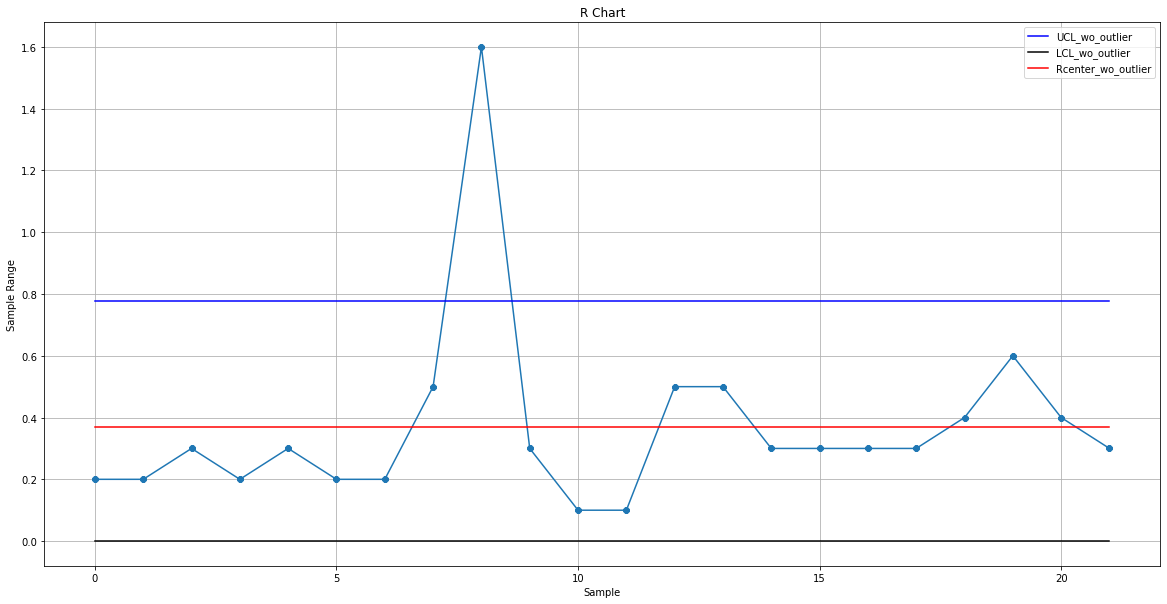

In [137]:
fig_plt = make_controlchart_plt(data, 'R', 'R_wo_outlier_UCL', 'R_wo_outlier_LCL', 'Rbar_wo_outlier', 'R Bar Chart Wo Outlier', 'Sample', 'Sample Range')

## R Bar Chart Without Second Outlier

In [138]:
# In the previous R-bar chart there is one more outlier value which is 1.6. And this outlier value is also associated with a reason.
# Since, there was a economic crises between 2008-2012 in the U.S. for the first 5 months R(max)-R(min) value is exceed the Upper Control Limit.
# Since, this is an assignable cause we need to remove this value which is related with 2009's first 5 months R(max)-R(min) value.

In [139]:
data_wo_outlier2 = pd.read_excel('unemployment-data_removed_r_outlier2.xlsx',sheet_name=1) # data_wo_outlier: data_without_outlier

In [140]:
data_wo_outlier2

,"m=21, n=5",1,2,3,4,5,x̄,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
5,2006,4.7,4.8,4.7,4.7,4.6,4.70,0.2
6,2007,4.6,4.5,4.4,4.5,4.4,4.48,0.2
7,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5
8,2010,9.8,9.8,9.9,9.9,9.6,9.80,0.3
9,2011,9.1,9.0,9.0,9.1,9.0,9.04,0.1


In [141]:
# Control Chart Constants
d2 = 2.326
a2 = .577
d3 = 0
d4 = 2.114

In [148]:
r_wo_outlier_bar2 = data_wo_outlier2['R'].mean()
r_wo_outlier_ucl2 = r_wo_outlier_bar2 * d4
r_wo_outlier_lcl2 = r_wo_outlier_bar2 * d3

In [149]:
R_wo_outlier2 = copy.deepcopy(data_wo_outlier2)

In [150]:
R_wo_outlier2.insert(7,'Rbar_wo_outlier2', r_wo_outlier_bar2)
R_wo_outlier2.insert(8,'R_wo_outlier_UCL2', r_wo_outlier_ucl2)
R_wo_outlier2.insert(9,'R_wo_outlier_LCL2', r_wo_outlier_lcl2)

In [152]:
R_wo_outlier2.head(5)

,"m=21, n=5",1,2,3,4,5,x̄,Rbar_wo_outlier2,R_wo_outlier_UCL2,R_wo_outlier_LCL2,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.309524,0.654333,0.0,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.309524,0.654333,0.0,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.309524,0.654333,0.0,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.309524,0.654333,0.0,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.309524,0.654333,0.0,0.3


In [153]:
def make_controlchart_plt(data, main, R_wo_outlier_UCL2, R_wo_outlier_LCL2, Rbar_wo_outlier2, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 

    plt.plot(R_wo_outlier2[main], marker = "8")
    plt.plot(R_wo_outlier2[R_wo_outlier_UCL2], color='b', label = 'UCL_wo_outlier2')
    plt.plot(R_wo_outlier2[R_wo_outlier_LCL2], color='k', label = 'LCL_wo_outlier2')
    plt.plot(R_wo_outlier2[Rbar_wo_outlier2], color='r', label ='Rcenter_wo_outlier2')
    
    plt.legend()
    plt.grid()
    plt.title('R Chart')
    plt.xlabel('Sample')
    plt.ylabel('Sample Range')
    
    return fig

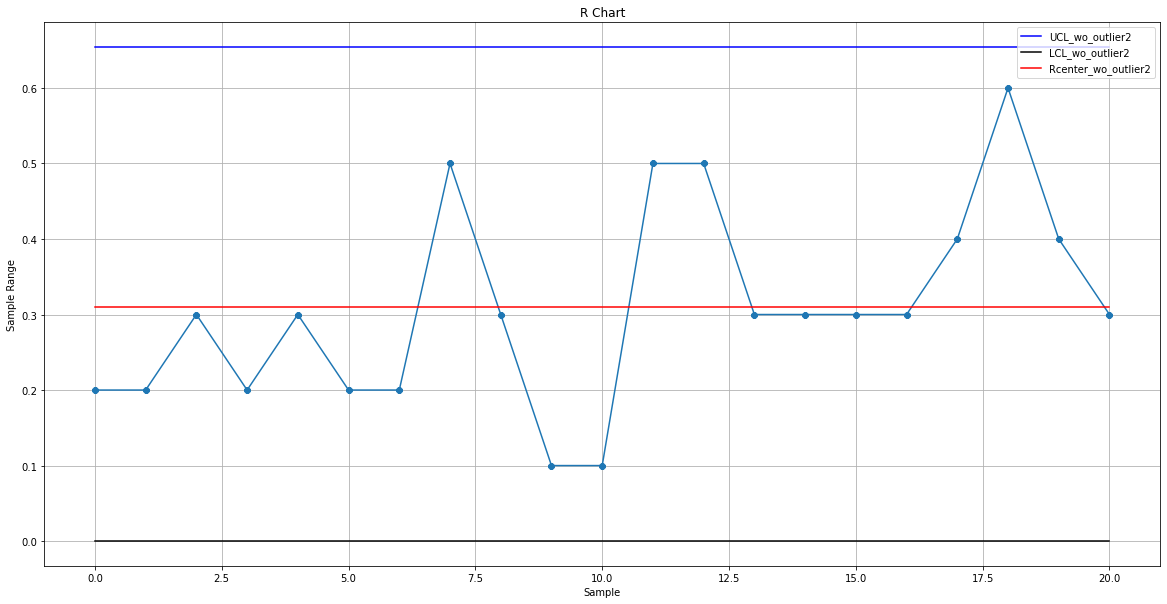

In [154]:
fig_plt = make_controlchart_plt(data, 'R', 'R_wo_outlier_UCL2', 'R_wo_outlier_LCL2', 'Rbar_wo_outlier2', 'R Bar Chart Wo Outlier2', 'Sample', 'Sample Range')

In [ ]:
# Now, within R Bar Chart everything is on our control. We removed 2020's R(max)-R(min) value due to first five months of 2020, COVID-19
# virus was spreading out, that was the reason why unemployment rate at USA is increased.
# For the second conclusion, at 2009, R(max)-R(min) value was outbound. After we eliminated 2020's Ri value; at that moment 2009 was also
# not in our control. Due to economic crises between 2008-2012, and stock market was lost its value %30 due to home mortages crises; At 2009
# unemployment was high and that caused the people to be fired from their job. Specifically, in the banking sector, a lot of people lost their job.

## X Bar Chart Without Outliers

In [ ]:
# From the dataset remove points which corresponds to years are:
    # 2009, 2010, 2011, 2012, 2020, 2022, 2023 because they have assignable causes. 2008-2012 household stock market crises & 2020
    # COVID-19 crises, 2022-2023 lowest unemployment rate after the pandemic constraints are removed and life turned back to normal.

In [30]:
xbdata_wo_outliers = pd.read_excel('unemployment-data_xbar_outlier_points_removed.xlsx', sheet_name=1)

In [31]:
xbdata_wo_outliers

,"m=16, n=5",1,2,3,4,5,Xbar,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
5,2006,4.7,4.8,4.7,4.7,4.6,4.70,0.2
6,2007,4.6,4.5,4.4,4.5,4.4,4.48,0.2
7,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5
8,2013,8.0,7.7,7.5,7.6,7.5,7.66,0.5
9,2014,6.6,6.7,6.7,6.2,6.3,6.50,0.5


In [19]:
# Xbar control chart constants
a2 = .577
Rbar = xbdata_wo_outliers['R'].mean()
Xdoublebar_wo_outliers = xbdata_wo_outliers['Xbar'].mean()
XB_ucl_wo_outliers = Xdoublebar_wo_outliers + (a2 * Rbar)
XB_lcl_wo_outliers = Xdoublebar_wo_outliers - (a2 * Rbar)

In [20]:
X_wo_outliers = copy.deepcopy(xbdata_wo_outliers)

In [21]:
X_wo_outliers

,"m=16, n=5",1,2,3,4,5,Xbar,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
5,2006,4.7,4.8,4.7,4.7,4.6,4.70,0.2
6,2007,4.6,4.5,4.4,4.5,4.4,4.48,0.2
7,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5
8,2013,8.0,7.7,7.5,7.6,7.5,7.66,0.5
9,2014,6.6,6.7,6.7,6.2,6.3,6.50,0.5


In [22]:
X_wo_outliers.insert(7,'X_double_bar_wo_outliers', Xdoublebar_wo_outliers)
X_wo_outliers.insert(8,'XB_UCL_wo_outliers', XB_ucl_wo_outliers)
X_wo_outliers.insert(9,'XB_LCL_wo_outliers', XB_lcl_wo_outliers)

In [23]:
X_wo_outliers.head()

,"m=16, n=5",1,2,3,4,5,Xbar,X_double_bar_wo_outliers,XB_UCL_wo_outliers,XB_LCL_wo_outliers,R
0,2001,4.2,4.2,4.3,4.4,4.3,4.28,5.2575,5.448631,5.066369,0.2
1,2002,5.7,5.7,5.7,5.9,5.8,5.76,5.2575,5.448631,5.066369,0.2
2,2003,5.8,5.9,5.9,6.0,6.1,5.94,5.2575,5.448631,5.066369,0.3
3,2004,5.7,5.6,5.8,5.6,5.6,5.66,5.2575,5.448631,5.066369,0.2
4,2005,5.3,5.4,5.2,5.2,5.1,5.24,5.2575,5.448631,5.066369,0.3


In [33]:
def make_xbar_controlchart_wo_outliers_plt(X_wo_outliers, main, XB_ucl, XB_lcl, median, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 
     
    plt.plot(X_wo_outliers[main], marker = "8")
    plt.plot(X_wo_outliers[XB_ucl], color='b', label = 'XB_UCL_wo_outliers')
    plt.plot(X_wo_outliers[XB_lcl], color='k', label = 'XB_LCL_wo_outliers')
    plt.plot(X_wo_outliers[median], color='r', label ='X_doublebar_wo_outliers')
    
    plt.legend()
    plt.grid()
    plt.title('X Chart Wo Outliers')
    plt.xlabel('Sample')
    plt.ylabel('Sample Range of Xbar')
    
    return fig

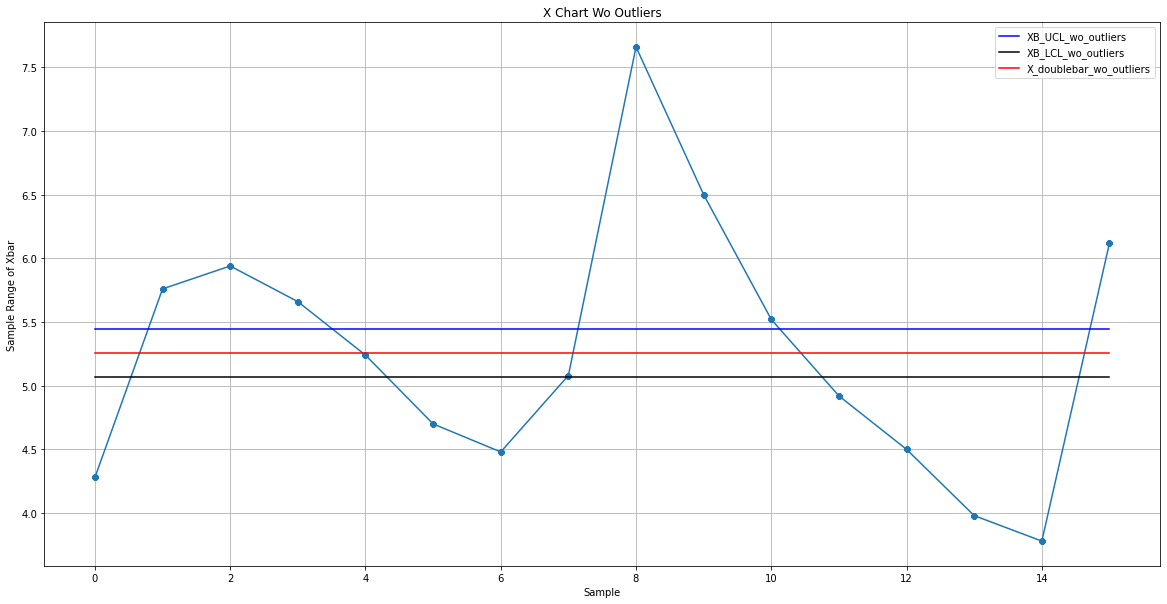

In [34]:
fig_plt = make_xbar_controlchart_wo_outliers_plt(X_wo_outliers, 'Xbar', 'XB_UCL_wo_outliers', 'XB_LCL_wo_outliers', 'X_double_bar_wo_outliers', 'X Bar Chart Wo Outliers', 'Sample', 'Sample Range ofXbar Chart Wo Outliers')

## X Bar Chart Without All Outliers

In [ ]:
# 2001, 2002, 2003, 2004, 2006, 2007, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2021 are removed then we had 2 data points.
# These years are removed because they were outliers. Each of them were not fitting it into control charts Upper Control Limits and
# Lower control limits. Hence, we removed in order to gain better understanding of it.
# At our hands we remained 2008 and 2008 data Where averages  of first 5 months.

In [35]:
last_xbdata_wo_outliers = pd.read_excel('last_unemployment-data_xbar_outlier_points_removed.xlsx', sheet_name=1)

In [36]:
last_xbdata_wo_outliers

,"m=16, n=5",1,2,3,4,5,Xbar,R
0,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
1,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5


In [37]:
# Xbar control chart constants
a2 = .577
last_Rbar = last_xbdata_wo_outliers['R'].mean()
last_Xdoublebar_wo_outliers = last_xbdata_wo_outliers['Xbar'].mean()
last_XB_ucl_wo_outliers = last_Xdoublebar_wo_outliers + (a2 * Rbar)
last_XB_lcl_wo_outliers = last_Xdoublebar_wo_outliers - (a2 * Rbar)

In [38]:
last_X_wo_outliers = copy.deepcopy(last_xbdata_wo_outliers)

In [39]:
last_X_wo_outliers

,"m=16, n=5",1,2,3,4,5,Xbar,R
0,2005,5.3,5.4,5.2,5.2,5.1,5.24,0.3
1,2008,5.0,4.9,5.1,5.0,5.4,5.08,0.5


In [40]:
last_X_wo_outliers.insert(7,'last_X_double_bar_wo_outliers', last_Xdoublebar_wo_outliers)
last_X_wo_outliers.insert(8,'last_XB_UCL_wo_outliers', last_XB_ucl_wo_outliers)
last_X_wo_outliers.insert(9,'last_XB_LCL_wo_outliers', last_XB_lcl_wo_outliers)

In [41]:
last_X_wo_outliers.head()

,"m=16, n=5",1,2,3,4,5,Xbar,last_X_double_bar_wo_outliers,last_XB_UCL_wo_outliers,last_XB_LCL_wo_outliers,R
0,2005,5.3,5.4,5.2,5.2,5.1,5.24,5.16,5.351131,4.968869,0.3
1,2008,5.0,4.9,5.1,5.0,5.4,5.08,5.16,5.351131,4.968869,0.5


In [54]:
def last_make_xbar_controlchart_wo_outliers_plt(last_X_wo_outliers, main, XB_ucl, XB_lcl, median, title, x_title, y_title):
    fig = plt.figure(figsize=(20, 10)) 
     
    plt.plot(last_X_wo_outliers[main], marker = "8")
    plt.plot(last_X_wo_outliers[XB_ucl], color='b', label = 'last_XB_UC_wo_outliers')
    plt.plot(last_X_wo_outliers[XB_lcl], color='k', label = 'last_XB_LCL_wo_outliers')
    plt.plot(last_X_wo_outliers[median], color='r', label ='last_X_double_bar_wo_outliers')
    
    plt.legend()
    plt.grid()
    plt.title('last X Chart')
    plt.xlabel('Sample')
    plt.ylabel('last Sample Range of Xbar')
    
    return fig

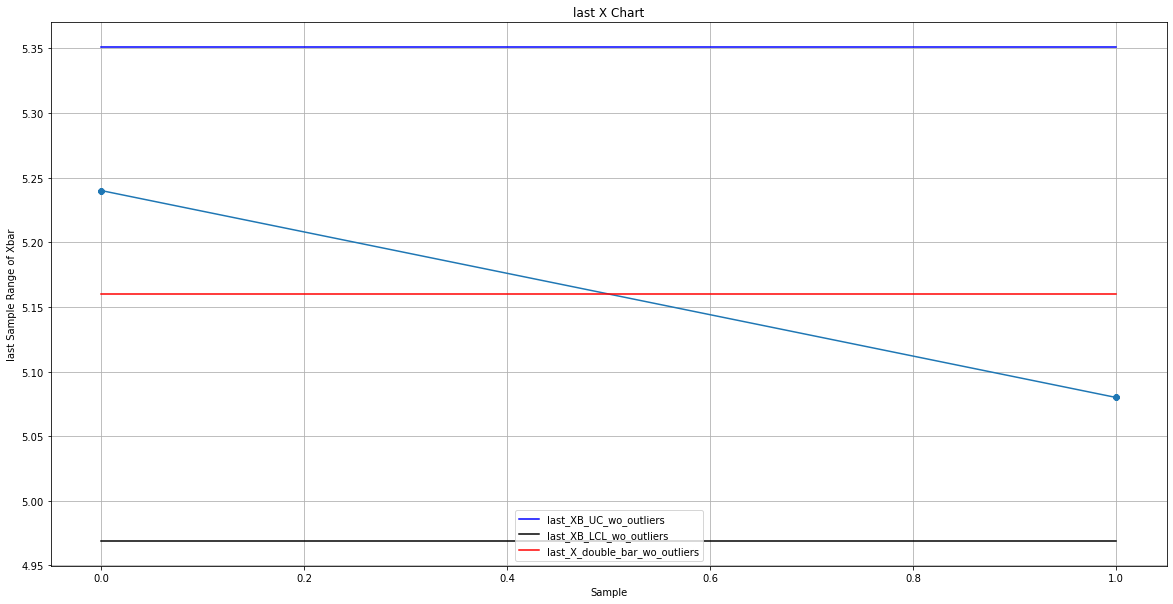

In [55]:
fig_plt = last_make_xbar_controlchart_wo_outliers_plt(last_X_wo_outliers, 'Xbar', 'last_XB_UCL_wo_outliers', 'last_XB_LCL_wo_outliers', 'last_X_double_bar_wo_outliers', 'Last X Bar Chart Wo Outliers', 'Sample', 'Last Sample Range ofXbar Chart Wo Outliers')

In [56]:
# At then end, unemployment rate in the US is now in our control.